shape: (2_334, 13)
┌─────────┬────────────┬──────────┬──────────┬───┬──────┬──────────────┬─────────────┬─────────────┐
│ track   ┆ type       ┆ shortcut ┆ player   ┆ … ┆ year ┆ track_index  ┆ track_index ┆ shortcut_fl │
│ ---     ┆ ---        ┆ ---      ┆ ---      ┆   ┆ ---  ┆ ---          ┆ _jitter     ┆ ag          │
│ str     ┆ str        ┆ str      ┆ str      ┆   ┆ i32  ┆ str          ┆ ---         ┆ ---         │
│         ┆            ┆          ┆          ┆   ┆      ┆              ┆ f64         ┆ f64         │
╞═════════╪════════════╪══════════╪══════════╪═══╪══════╪══════════════╪═════════════╪═════════════╡
│ Luigi   ┆ Three Lap  ┆ No       ┆ Salam    ┆ … ┆ 1997 ┆ 8            ┆ 8.24634     ┆ 0.0         │
│ Raceway ┆            ┆          ┆          ┆   ┆      ┆              ┆             ┆             │
│ Luigi   ┆ Three Lap  ┆ No       ┆ Booth    ┆ … ┆ 1997 ┆ 8            ┆ 7.972084    ┆ 0.0         │
│ Raceway ┆            ┆          ┆          ┆   ┆      ┆              ┆

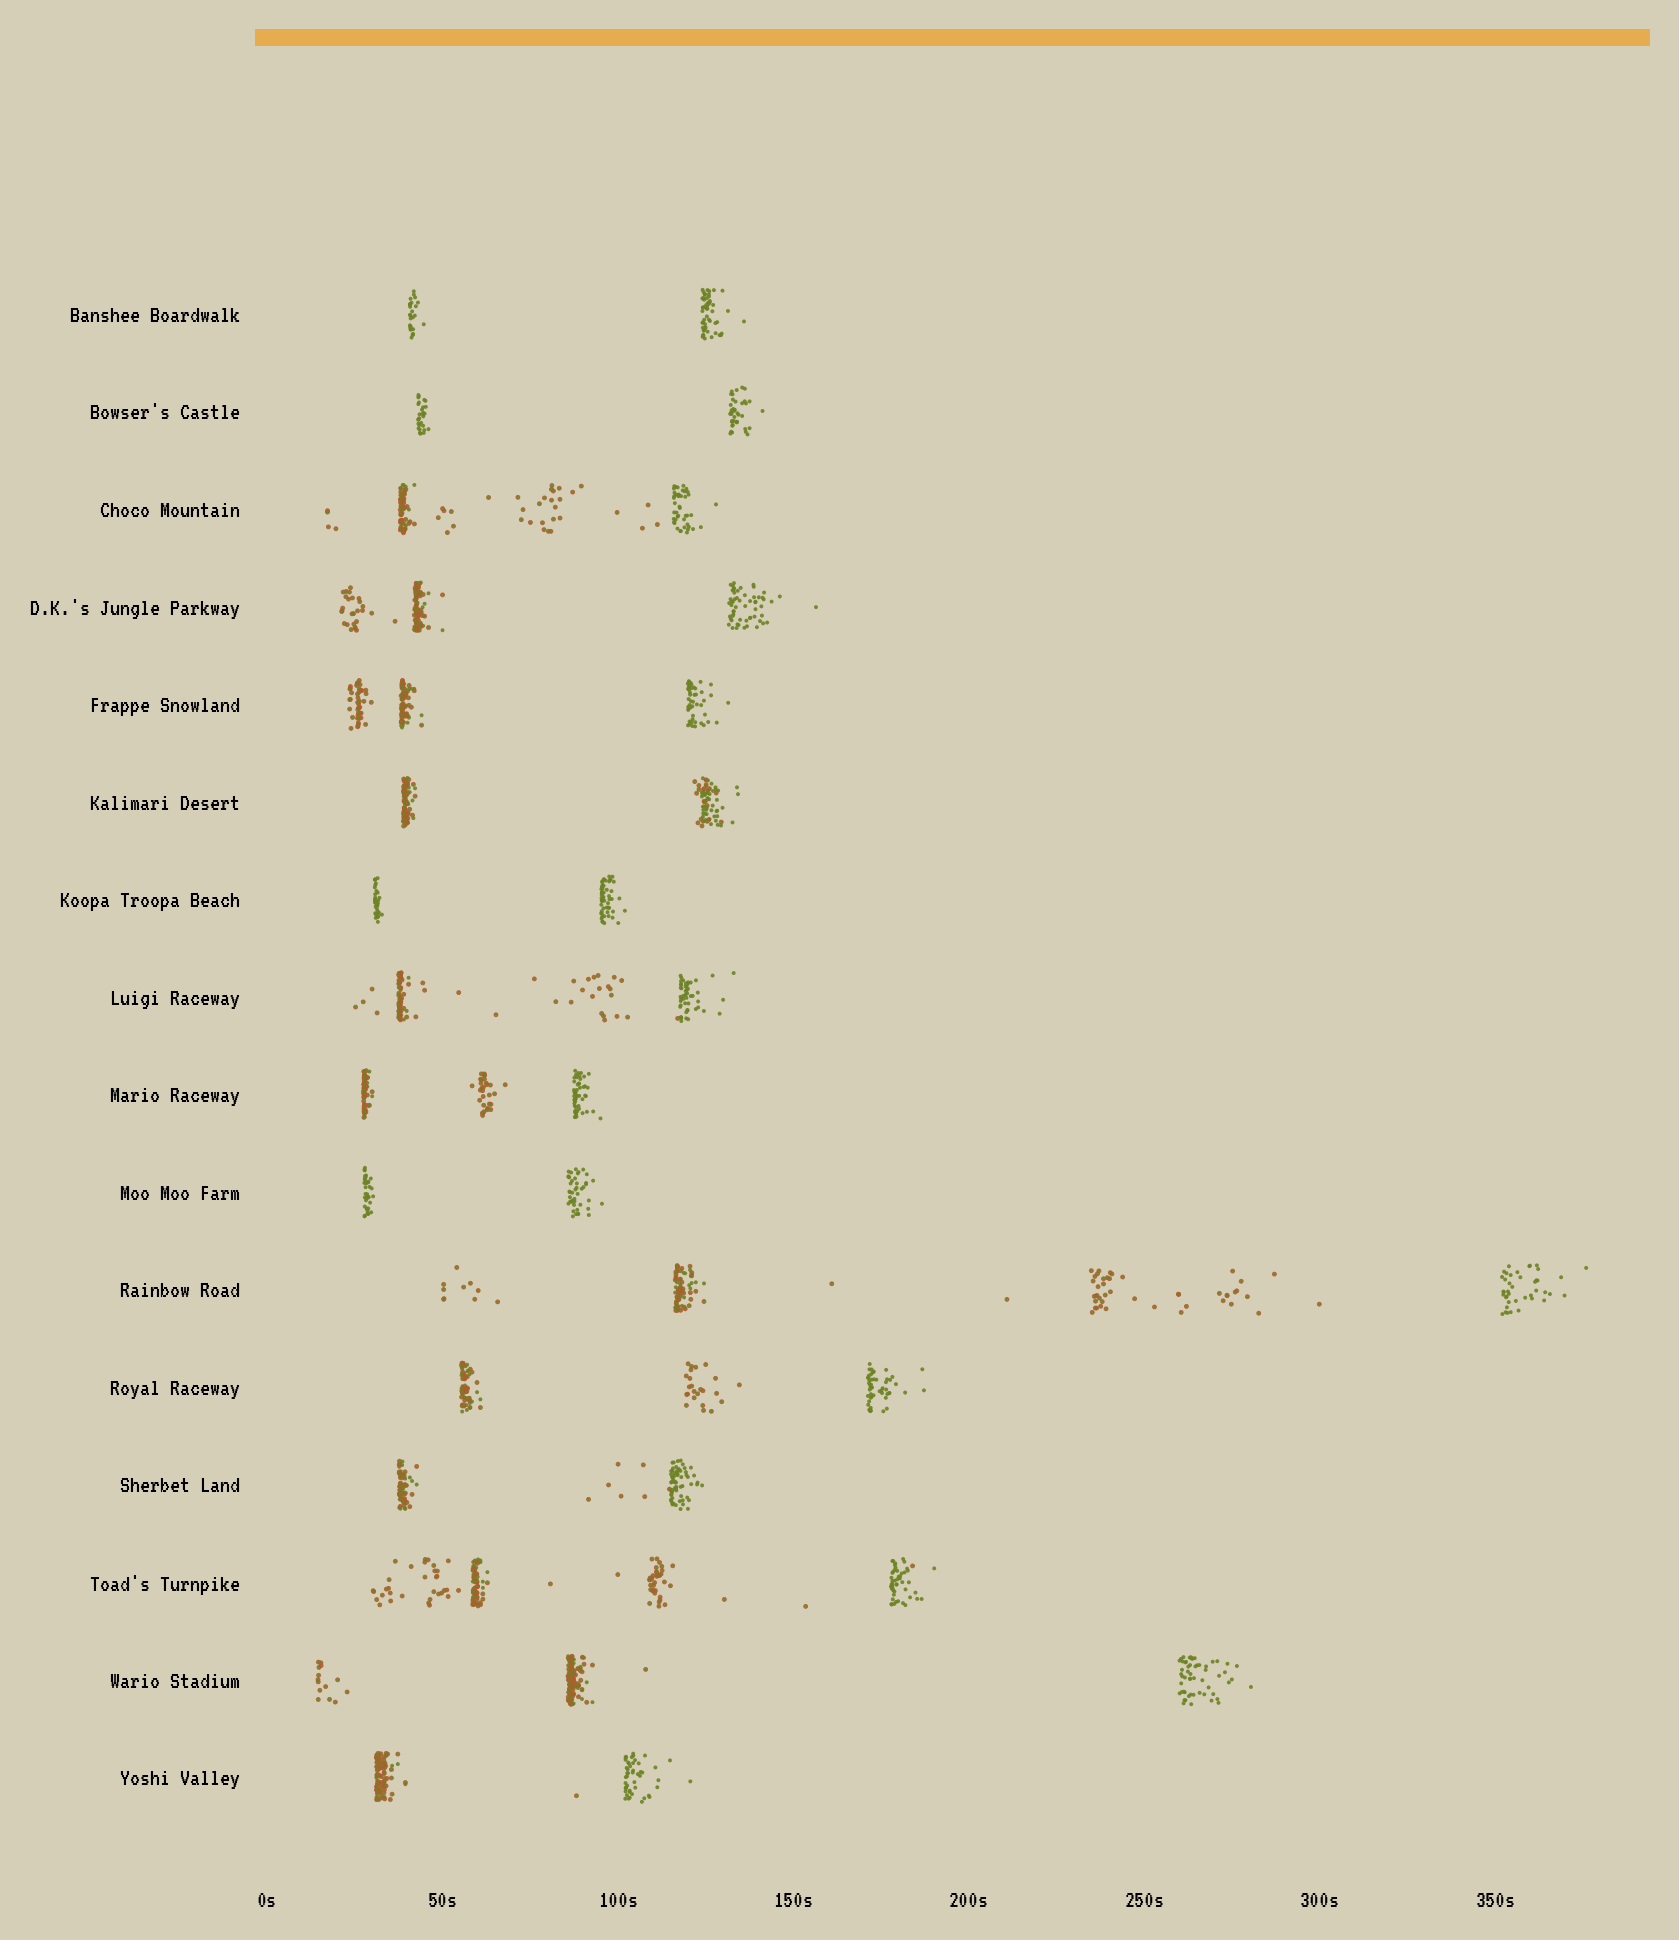

In [135]:
import pydytuesday
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
from pyfonts import load_google_font
from highlight_text import fig_text, ax_text
import matplotlib.patheffects as path_effects

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/mariokart/mariokart.csv"


df_mario = pl.read_csv(url)
df_mario = df_mario.with_columns(
    year = pl.col("date").cast(pl.Date).dt.year()
)

tracks = df_mario['track'].unique()
tracks=tracks.sort(descending=True).to_list()
track_to_index = {track: idx for idx, track in enumerate(tracks)}
df_mario = df_mario.with_columns(
    pl.col('track').replace(track_to_index).alias('track_index')
)


def jitter(df, col, amount=0.25):
    return df[col].to_numpy().astype(float) + np.random.uniform(-amount, amount, len(df))

df_mario = df_mario.with_columns(
    track_index_jitter = jitter(df_mario, 'track_index'), 
    shortcut_flag = pl.when(pl.col('shortcut') == 'Yes')
     .then(0.2)
     .otherwise(0.0)
)

print(df_mario)


# df_mario = df_mario.filter(pl.col('type') == 'Three Lap')
df_mario = df_mario.sort('track', descending=True)





mario_colors = [
    '#F6D358', # yellow
    '#AD332D',
    '#939FAF',
    '#477333',
    '#CE4C26',
    '#8A8E7F',
    '#E9C076',
    '#8A8E80',
    '#FAED86',
    '#B9F973',    
    '#edeada',
    '#100f24',
    '#5d8d60',
    '#c74634',
    '#e55d82',    
    '#409edb',
    '#e8bd00',
    '#7b6500',
    '#dd2020', 
    '#fad2a8',  
    '#9C5335'
]
from pypalettes import load_cmap
cmap = load_cmap("FridaKahlo").colors

ft_Silkscreenont = load_google_font("Silkscreen")
ft_VT323 = load_google_font("VT323")
df_PressStart = load_google_font("Press Start 2P")

df_mario = df_mario.to_pandas()
print(df_mario)

# Plot ------------------------------------------------> #

layout = [['title'], 
          ['left']
    ]
fig, axs = plt.subplot_mosaic(
                layout,
                figsize=(6,8), 
                dpi=300,
                facecolor=cmap[2],
                gridspec_kw={'height_ratios': [1,99],
                            'width_ratios': [1],
                            'wspace': 0
                            }
    )

# fig, ax = plt.subplots(figsize=(2, 5), dpi=300, facecolor=cmap[2])
# Left Side
ax = axs['left']
ax.set_facecolor(cmap[2])

ax.scatter(df_mario.time, 
           df_mario.track_index_jitter, 
           alpha=0.9, 
           s=0.9, 
           color=cmap[1], 
           edgecolors=cmap[-1], 
           linewidths=df_mario.shortcut_flag)

ax.set_yticks(np.arange(len(tracks)))
ax.set_yticklabels(tracks, fontproperties=ft_VT323)
ax.tick_params(axis='y', length=0)
ax.tick_params(labelsize=6)
ax.set_yticklabels(tracks, fontproperties=ft_VT323, fontsize=6)

time_label = ['0s', '50s', '100s', '150s', '200s', '250s', '300s', '350s']
ax.set_xticks(np.arange(8)*50)
ax.set_xticklabels(time_label, fontproperties=ft_VT323, fontsize=6)
ax.tick_params(axis='x', length=0)

ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# top  plot
ax = axs['title']
ax.set_facecolor(cmap[3])
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_xticks([])
ax.set_yticklabels([])
ax.tick_params(axis='y', length=0)


# fig_text(
#    s='Mario Kart Records by Rrack',
#    x=0.45, y=0.95, fontsize=16,
#    ha='center', color=cmap[0],
#    font=df_PressStart, fig=fig
# )
fig.savefig('MarioKart-Finish-01.png')
plt.show()




/Users/jpena/Documents/wip/cadmium/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Color Emoji.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jpena/Documents/wip/cadmium/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Noto Color Emoji.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jpena/Documents/wip/cadmium/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Color Emoji.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jpena/Documents/wip/cadmium/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Noto Color Emoji.
  fig.canvas.print_figure(bytes_io, **kw)


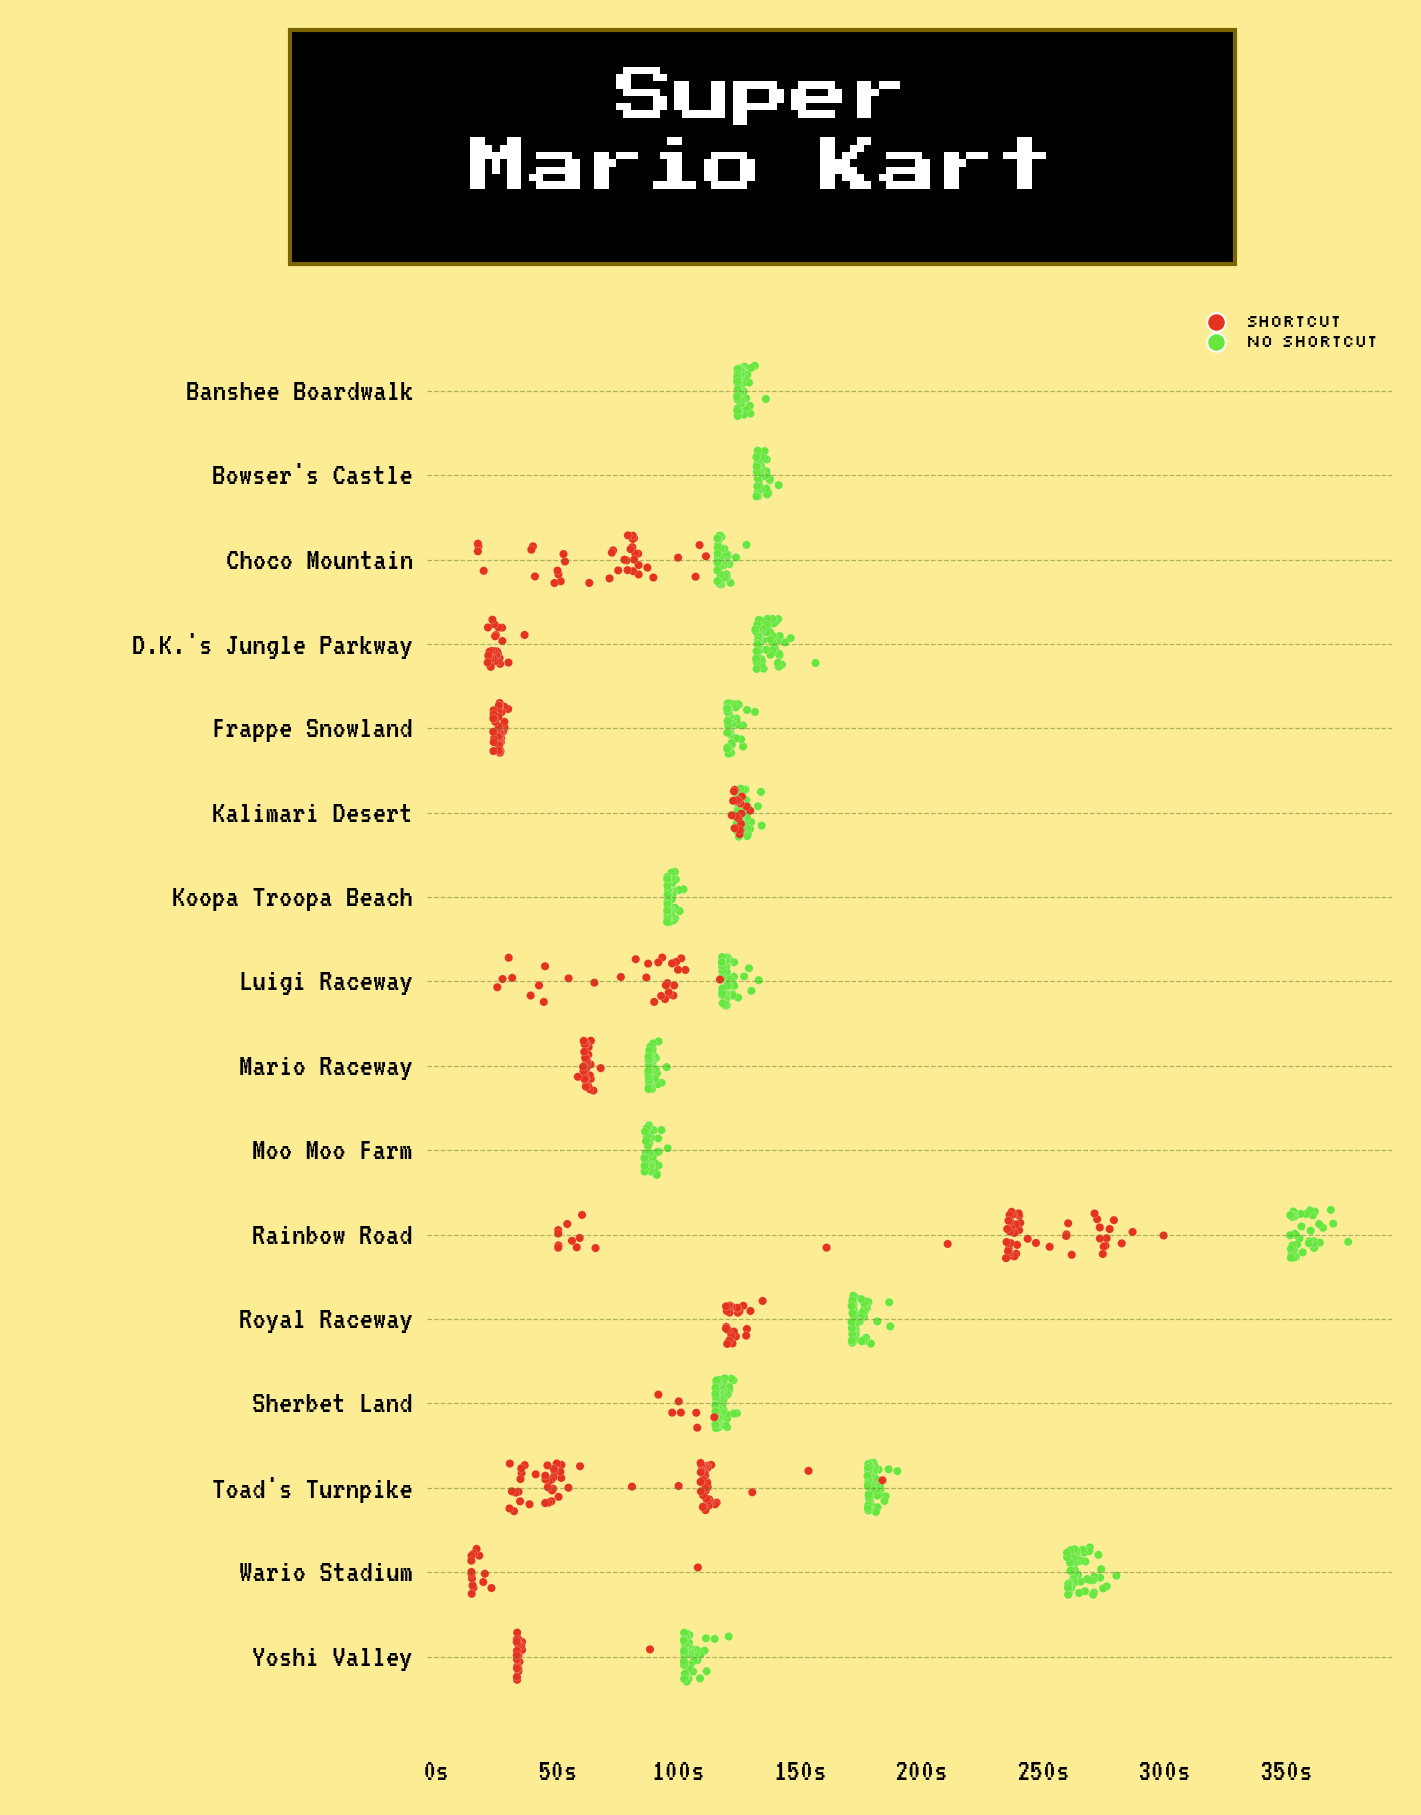

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
from pyfonts import load_google_font
from highlight_text import fig_text, ax_text
import matplotlib.patheffects as path_effects
from matplotlib.font_manager import FontProperties
import matplotlib.patches as patches


url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/mariokart/mariokart.csv"


df_mario = pl.read_csv(url)
df_mario = df_mario.with_columns(
    year = pl.col("date").cast(pl.Date).dt.year()
)

tracks = df_mario['track'].unique()
tracks=tracks.sort(descending=True).to_list()
track_to_index = {track: idx for idx, track in enumerate(tracks)}
df_mario = df_mario.with_columns(
    pl.col('track').replace(track_to_index).alias('track_index')
)


from pypalettes import load_cmap
cmap = load_cmap("FridaKahlo").colors

mario_colors = [
    '#FCED94',
    '#E5341D',
    '#67E73D',
    '#FFFFB4'
    "#CFC9B1",
    '#A65332',
    '#66772D',
    '#939FAF',
    "#8EE466",
    '#CE4C26',
    '#8A8E7F',
    '#E9C076',
    '#8A8E80',
    '#FAED86',
    '#B9F973',    
    '#edeada',
    '#100f24',
    '#5d8d60',
    '#c74634',
    '#e55d82',    
    "#89b7d6",
    '#e8bd00',
    '#7b6500',
    '#dd2020', 
    '#fad2a8',  
    '#9C5335'
]

def jitter(df, col, amount=0.30):
    return df[col].to_numpy().astype(float) + np.random.uniform(-amount, amount, len(df))

df_mario = df_mario.with_columns(
    track_index_jitter = jitter(df_mario, 'track_index'), 
    shortcut_flag = pl.when(pl.col('shortcut') == 'Yes')
     .then(0.5)
     .otherwise(0.0),
    shortcut_flag_color = pl.when(pl.col('shortcut') == 'Yes')
     .then(pl.lit(mario_colors[1]))
     .otherwise(pl.lit(mario_colors[2]))
)


df_mario = df_mario.filter(pl.col('type') == 'Three Lap')
df_mario = df_mario.sort('track', descending=True)

ft_Silkscreenont = load_google_font("Silkscreen")
ft_VT323 = load_google_font("VT323")
df_PressStart = load_google_font("Press Start 2P")
notoEmoji = load_google_font("Noto Color Emoji")

df_mario = df_mario.to_pandas()

# Plot ------------------------------------------------> #

fig, ax = plt.subplots(figsize=(4.5, 6), dpi=300, facecolor=mario_colors[0])
# Left Side

ax.set_facecolor(mario_colors[0])

ax.scatter([], [], color=mario_colors[1], label='Shortcut', s=20, edgecolors='white', linewidths=0.5)
ax.scatter([], [], color=mario_colors[2], label='No Shortcut', s=20, edgecolors='white', linewidths=0.5)

ax.scatter(df_mario.time, 
           df_mario.track_index_jitter, 
           alpha=1, 
           s=4, 
           color=df_mario.shortcut_flag_color,
           edgecolors='white', 
           linewidths=0.04
)
ax.set_yticks(np.arange(len(tracks)))
ax.tick_params(axis='y', length=0)
ax.tick_params(labelsize=6)
ax.set_yticklabels(tracks, fontproperties=ft_VT323, fontsize=8)

time_label = ['0s', '50s', '100s', '150s', '200s', '250s', '300s', '350s']
ax.set_xticks(np.arange(8)*50)
ax.set_xticklabels(time_label, fontproperties=ft_VT323, fontsize=8)
ax.tick_params(axis='x', length=0)

ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

ax.grid(True, which='major', axis='y', 
        color=mario_colors[5], 
        linestyle='--', linewidth=0.3, alpha=0.5)

# Add the legend
ft_Silkscreenont.set_size(4)
legend = ax.legend( loc='best', 
                    frameon=False, 
                    prop=ft_Silkscreenont)
legend.get_frame().set_facecolor('none')

fig.tight_layout()


fig.patches.extend([
    patches.Rectangle(
        (.15, 0.87),    # (x, y) position in figure coordinates
        .70,            # width (fraction of figure)
        0.13,         # height (fraction of figure)
        transform=fig.transFigure,
        facecolor='black',
        edgecolor=mario_colors[-4],
        linewidth=1,
        zorder=2
        
    )
])

fig.suptitle(
    "Super\nMario Kart",
    fontproperties=df_PressStart,
    fontsize=14,
    color='white',
    path_effects=[path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()]
)


fig.text(0.05, 0.93, "🍄", 
         fontproperties=notoEmoji, 
         fontsize=48, 
         ha='center', 
         va='center', 
         transform=fig.transFigure)

plt.subplots_adjust(top=0.85)
#fig.savefig('plots/MarioKart-Finish-01.png')
plt.show()




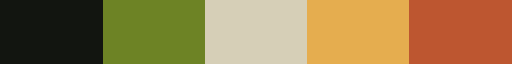

In [71]:
from pypalettes import load_cmap
cmap = load_cmap("FridaKahlo")
cmap


In [2]:
import ipywidgets as widgets
color_picker = widgets.ColorPicker(
concise=False,
description='Choose a color:',
value='blue'
)
display(color_picker)

ModuleNotFoundError: No module named 'ipywidgets'